# Chapter 13: Hydrogen functions
Start with some imports fro Symbolic Python library:

In [1]:
from sympy.physics.hydrogen import R_nl
from sympy.functions.special.spherical_harmonics import Ynm
from sympy import *

Define some variables, radial, polar, azimuthal, time, and two frequencies:

In [2]:
var("r theta phi t w1 w2")

(r, theta, phi, t, w1, w2)

## Look at a few of the radial equations and the spherical harmonics
Notice that instead of Ylm the name is Ynm... the arguments to the function are still the quantum numbers `l` and `m`

In [3]:
R_nl(1, 0, r, 1)  # the n = 1, l = 0 radial function

2*exp(-r)

In [4]:
Ynm(0,0,theta,phi).expand(func=True)  # the l = 0, m = 0 spherical harmonic

1/(2*sqrt(pi))

Write the equation for the $|nlm\rangle = |100\rangle$ state. Use the sympy method `.expand(func=True)` to convert to the actual expression. To create this state, we combine the Radial function and the Ylm function. Make sure to set n, l, and m to the correct values. The fourth argument to `R_nl` is `Z` which we set to 1 since we are talking about a 1-proton nucleus.

The combination of R_nl and Ynm should look like the following (replace N, L, and M with the appropriate values):

`R_nl(N, L, r, 1)*Ynm(L, M, theta, phi).expand(func=True)`

In [5]:
# this is the |100> state:
psi100 = R_nl(1, 0, r, 1)*Ynm(0,0,theta,phi).expand(func=True)

In [6]:
psi100  # check to see how it looks as an expression

exp(-r)/sqrt(pi)

## Integrating over all space
Remember spherical coordinate integrals of function $f(r,\theta,\phi)$ over all space look like: $$\int_0^\infty\int_0^\pi\int_0^{2\pi}r^2\sin(\theta)drd\theta d\phi \,\,f(r,\theta,\phi)$$ so you alwasy need to add a factor of `r**2*sin(theta)` and then integrate `r` from 0 to infinity, `theta` from $0-\pi$ and `phi` from $0-2\pi$. As a check, you should integrate the square of the `psi100` wavefunction over all space to see that it equals 1 (i.e. it is normalized)

In [7]:
integrate(r**2*sin(theta) * (psi100)**2 ,(r,0,oo),(theta,0,pi),(phi,0,2*pi))

1

## Now do the $|210\rangle$ state:

In [8]:
psi210 = R_nl(2, 1, r, 1)*Ynm(1,0,theta,phi).expand(func=True)

In [9]:
psi210  # check how it looks

sqrt(2)*r*exp(-r/2)*cos(theta)/(8*sqrt(pi))

Note, if you compare these to listed solutions (for example at http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/hydwf.html#c3) you see that there are not any factors of $a_0$. This is because the `R_nl` function is defined in units of $a_0$. $a_0$ is the Bohr Radius: http://en.wikipedia.org/wiki/Bohr_radius

In [10]:
psi211 = R_nl(2, 1, r, 1)*Ynm(1,1,theta,phi).expand(func=True)
psi211

-r*exp(-r/2)*exp(I*phi)*sin(theta)/(8*sqrt(pi))

## Now calculate $\langle z \rangle$:
To calculate $\langle z \rangle$ we need to convert to spherical coordinates: $z = r\cos\theta$. The terms in the following integral are the $r^2\sin\theta$ then $z$ (in spherical coords) then the wave function squared.

In [11]:
expect = integrate(r**2*sin(theta)* (r*cos(theta)) * (psi100*psi100),(r,0,oo),(theta,0,pi),(phi,0,2*pi))

In [12]:
expect

0

No surprise, the average z position of the electron in the hydrogen atom is 0.

## Now for problem 13.21
find $\langle z \rangle(t)$. Use the same integral, but add a time-dependent piece to each term in the wavefunction, add them together and multiply by the complex conjugate.

In [13]:
psi = 1/sqrt(2)*(psi100*exp(1j*w1*t) + psi210*exp(1j*w2*t))
psi_conj = 1/sqrt(2)*(psi100*exp(-1j*w1*t) + psi210*exp(-1j*w2*t))

In [14]:
outer = (psi*psi_conj).simplify()

In [15]:
outer

(sqrt(2)*r*exp(r + 1.0*I*t*w1)*cos(theta) + 8*exp(r/2 + I*t*w2))*(sqrt(2)*r*exp(r + 1.0*I*t*w2)*cos(theta) + 8*exp(r/2 + I*t*w1))*exp(-3*r - 1.0*I*t*w1 - 1.0*I*t*w2)/(128*pi)

In [16]:
expect2 = integrate(r**2 * sin(theta) * (r*cos(theta)) * outer,(r,0,oo),(theta,0,pi),(phi,0,2*pi))

In [17]:
expect2

2*pi*(-(-27390260577042432*sqrt(2)*pi**11*exp(3.0*I*t*w1)*exp(5.0*I*t*w2) - 141371459682435072*pi**11*exp(4.0*I*t*w1)*exp(4.0*I*t*w2) - 27390260577042432*sqrt(2)*pi**11*exp(5.0*I*t*w1)*exp(3.0*I*t*w2))*exp(-4.0*I*t*w1)*exp(-4.0*I*t*w2)/(415989582513831936*pi**12) + (27390260577042432*sqrt(2)*pi**11*exp(3.0*I*t*w1)*exp(5.0*I*t*w2) - 141371459682435072*pi**11*exp(4.0*I*t*w1)*exp(4.0*I*t*w2) + 27390260577042432*sqrt(2)*pi**11*exp(5.0*I*t*w1)*exp(3.0*I*t*w2))*exp(-4.0*I*t*w1)*exp(-4.0*I*t*w2)/(415989582513831936*pi**12))

In [18]:
expect2.simplify()

64*sqrt(2)*(exp(2.0*I*t*w1) + exp(2.0*I*t*w2))*exp(-1.0*I*t*(w1 + w2))/243

We need to interpret this result. First you should show that this expression is simply a constant amplitude factor times $\cos((w2-w1)t)$, in other words $\langle z \rangle$ oscillates at frequency `w2-w1`.

## Your assignment:

Explore other combinations of states and draw conclusions about the z behavior from the results. You may not be able to get these expressions to simplify, but the important thing is to look for the time dependence and simplify that part.

- Does $\langle z \rangle$ oscillate for any combination of two Hydrogen states $|nlm\rangle$?
- Are there restrictions on what n values give oscillating $\langle z \rangle$ expressions? (hint, to keep it simple, always let one state be the n=1 state)
- How does $\langle z \rangle$ change with different l and m values are used in the state?

Hints for interpreting your results:
- What are the relavant frequencies in your expression for $\langle z \rangle$ and why?
- Simplify one of your $\langle z \rangle$ expressions and write the time dependence in terms of the frequencies w2 and w1.

In [19]:
psi210 = R_nl(2, 1, r, 1)*Ynm(1,0,theta,phi).expand(func=True)
psi2 = 1/sqrt(2)*(psi100*exp(1j*w1*t) + psi210*exp(1j*w2*t))
psi2_conj = 1/sqrt(2)*(psi100*exp(-1j*w1*t) + psi210*exp(-1j*w2*t))

In [20]:
expect3 = integrate(r**2*sin(theta)* (r*cos(theta)) * psi2*psi2_conj,(r,0,oo),(theta,0,pi),(phi,0,2*pi))

In [21]:
expect3

2*pi*(-(-27390260577042432*sqrt(2)*pi**11*exp(3.0*I*t*w1)*exp(5.0*I*t*w2) - 141371459682435072*pi**11*exp(4.0*I*t*w1)*exp(4.0*I*t*w2) - 27390260577042432*sqrt(2)*pi**11*exp(5.0*I*t*w1)*exp(3.0*I*t*w2))*exp(-4.0*I*t*w1)*exp(-4.0*I*t*w2)/(415989582513831936*pi**12) + (27390260577042432*sqrt(2)*pi**11*exp(3.0*I*t*w1)*exp(5.0*I*t*w2) - 141371459682435072*pi**11*exp(4.0*I*t*w1)*exp(4.0*I*t*w2) + 27390260577042432*sqrt(2)*pi**11*exp(5.0*I*t*w1)*exp(3.0*I*t*w2))*exp(-4.0*I*t*w1)*exp(-4.0*I*t*w2)/(415989582513831936*pi**12))

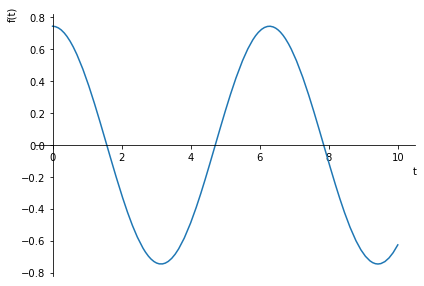

In [22]:
plot(re(expect3.subs({w2:2, w1:1})),(t,0,10))